In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# automata playground
N = 60     # size of the playground
S = [3, 5, 6, 7, 8]    # Set of Survive rules
B = [4, 6, 7, 8] # Set of Born rules

automata = np.zeros((N, N))
automataNeighbours = np.zeros((N,N))

In [3]:
def AutomataStep():
    automataNeighbours[0:N][0:N] = 0
    for i in range(N):
        for j in range(N):
            automataNeighbours[i][j] += automata[i-1][j-1]
            automataNeighbours[i][j] += automata[i-1][j]
            automataNeighbours[i][j] += automata[i-1][(j+1)%N]
            automataNeighbours[i][j] += automata[i][j-1]
            automataNeighbours[i][j] += automata[i][(j+1)%N]
            automataNeighbours[i][j] += automata[(i+1)%N][j-1]
            automataNeighbours[i][j] += automata[(i+1)%N][j]
            automataNeighbours[i][j] += automata[(i+1)%N][(j+1)%N]
    for i in range(N):
        for j in range(N):
            if automata[i][j] == 0 and automataNeighbours[i][j] in B:
                automata[i][j] = 1
                continue
            if automata[i][j] == 1 and automataNeighbours[i][j] in S:
                continue
            automata[i][j] = 0

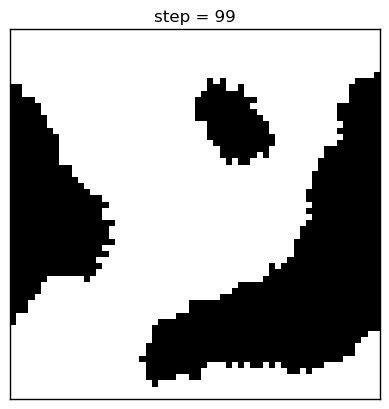

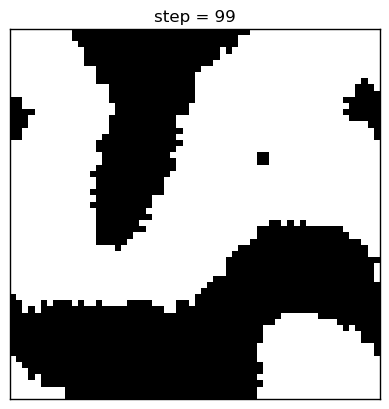

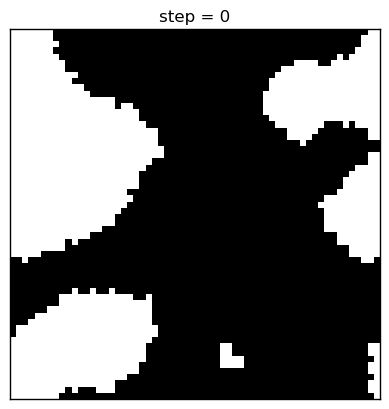

In [5]:
for gif in range(3):
    # Entry state
    for i in range(N):
        for j in range(N):
            automata[i][j] = np.random.randint(0,2)

    # print(automata)

    # Make gif
    import matplotlib.animation as animation

    fig, ax = plt.subplots()

    im = ax.imshow(automata, cmap='gray')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    plt.savefig(f'automata{gif}_start.png')

    def animate(i):
        AutomataStep()
        im.set_data(automata)
        ax.set_title(f'step = {i}')
        return im,

    frames = 100

    ani = animation.FuncAnimation(fig, animate, repeat=False, frames=frames, interval=50)

    # save animation
    writer = animation.PillowWriter(fps=6,
                                    metadata=dict(artist='Me'),
                                    bitrate=1800)
    ani.save(f'automata{gif}.gif', writer=writer)